In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import pickle

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv(r'C:\Users\Ni Wayan Devina\ML\Medical Insurance\Dataset\Medicalpremium.csv')
data

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000
...,...,...,...,...,...,...,...,...,...,...,...
981,18,0,0,0,0,169,67,0,0,0,15000
982,64,1,1,0,0,153,70,0,0,3,28000
983,56,0,1,0,0,155,71,0,0,1,29000
984,47,1,1,0,0,158,73,1,0,1,39000


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      986 non-null    int64
 1   Diabetes                 986 non-null    int64
 2   BloodPressureProblems    986 non-null    int64
 3   AnyTransplants           986 non-null    int64
 4   AnyChronicDiseases       986 non-null    int64
 5   Height                   986 non-null    int64
 6   Weight                   986 non-null    int64
 7   KnownAllergies           986 non-null    int64
 8   HistoryOfCancerInFamily  986 non-null    int64
 9   NumberOfMajorSurgeries   986 non-null    int64
 10  PremiumPrice             986 non-null    int64
dtypes: int64(11)
memory usage: 84.9 KB


In [4]:
data.describe()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
count,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000
mean,41.745436,0.419878,0.468560,0.055781,0.180527,168.182556,76.950304,0.215010,0.117647,0.667343,24336.713996
std,13.963371,0.493789,0.499264,0.229615,0.384821,10.098155,14.265096,0.411038,0.322353,0.749205,6248.184382
min,18.000000,0.000000,0.000000,0.000000,0.000000,145.000000,51.000000,0.000000,0.000000,0.000000,15000.000000
25%,30.000000,0.000000,0.000000,0.000000,0.000000,161.000000,67.000000,0.000000,0.000000,0.000000,21000.000000
50%,42.000000,0.000000,0.000000,0.000000,0.000000,168.000000,75.000000,0.000000,0.000000,1.000000,23000.000000
75%,53.000000,1.000000,1.000000,0.000000,0.000000,176.000000,87.000000,0.000000,0.000000,1.000000,28000.000000
max,66.000000,1.000000,1.000000,1.000000,1.000000,188.000000,132.000000,1.000000,1.000000,3.000000,40000.000000


In [5]:
data.isnull().sum()

Age                        0
Diabetes                   0
BloodPressureProblems      0
AnyTransplants             0
AnyChronicDiseases         0
Height                     0
Weight                     0
KnownAllergies             0
HistoryOfCancerInFamily    0
NumberOfMajorSurgeries     0
PremiumPrice               0
dtype: int64

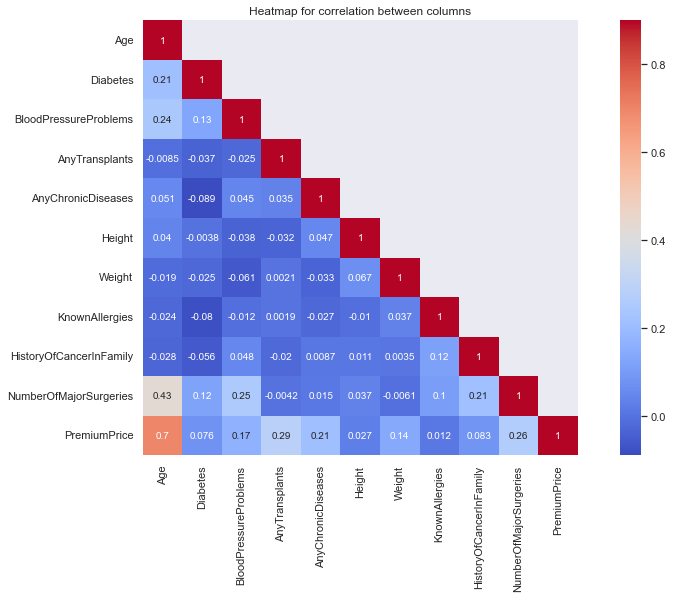

In [6]:
# heatmap
corr = data[['Age', 'Diabetes', 'BloodPressureProblems', 'AnyTransplants',
       'AnyChronicDiseases', 'Height', 'Weight', 'KnownAllergies',
       'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries', 'PremiumPrice']].corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(15,8)
sns.heatmap(corr, mask=mask,vmax=.9, square=True,annot=True, annot_kws={"size":10},cmap="coolwarm")
plt.title("Heatmap for correlation between columns")
plt.show()

In [7]:
target= np.array(data['PremiumPrice'])
features = data.drop('PremiumPrice', axis = 1)
feature_list = list(features.columns)
features = np.array(features)

# Random Forest with KFold
    
kf = KFold(n_splits=10,random_state=42,shuffle=True)
accuracies = []
acc = pd.DataFrame(columns=['Mean Absolute Error','Accuracy','Train  Accuracy',
                            'Test  Accuracy', 'R2 Score Train',
                            'R2 Score Test'])
for train_index, test_index in kf.split(features):

    data_train   = features[train_index]
    target_train = target[train_index]

    data_test    = features[test_index]
    target_test  = target[test_index]

    rf = RandomForestRegressor(n_estimators = 10, 
                               random_state = 42, 
                               criterion = 'mse',
                               bootstrap=True)
    
    rf.fit(data_train, target_train)

    predictions = rf.predict(data_test)

    errors = abs(predictions - target_test)
    
    mape = 100 * (errors / target_test)
    accuracy = 100 - np.mean(mape)
    acc = acc.append({'Mean Absolute Error': round(np.mean(errors), 2),
                     'Accuracy': round(accuracy, 2),
                     'Train  Accuracy': np.sqrt(mean_squared_error(target_train, rf.predict(data_train))),
                     'Test  Accuracy': np.sqrt(mean_squared_error(target_test, rf.predict(data_test))),
                     'R2 Score Train': r2_score(target_train, rf.predict(data_train)),
                     'R2 Score Test': r2_score(target_test, rf.predict(data_test)),}, ignore_index=True)
    accuracies.append(accuracy)

acc

,Mean Absolute Error,Accuracy,Train Accuracy,Test Accuracy,R2 Score Train,R2 Score Test
0,1081.82,95.48,1194.689490,2361.796098,0.963261,0.860988
1,1043.43,95.22,1360.548997,2797.816609,0.951693,0.826407
2,1057.58,96.30,1218.520181,3119.262410,0.961119,0.787641
3,1710.10,93.01,1157.895303,4078.311693,0.964847,0.638623
4,1137.37,95.16,1157.252510,3044.120015,0.966017,0.727668
5,1418.18,94.09,1149.197063,3238.624225,0.966319,0.717214
6,1115.31,95.39,1282.053006,3103.109040,0.958237,0.730572
7,1377.55,93.86,1165.103522,3507.019201,0.965859,0.612076
8,842.86,95.76,1258.762083,2364.835931,0.959892,0.837520
9,960.20,95.33,1166.513825,2633.245069,0.965308,0.812128


In [8]:
average_accuracy = np.mean(accuracies)
print('Average accuracy:', average_accuracy)

Average accuracy: 94.95969640611801


In [9]:
# saving the model for the app
pickle.dump(rf, open('Model/random_forest.pkl', 'wb'))